# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 622


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city.title(), 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | holualoa
Processing Record 2 of Set 1 | ad dabbah
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | taiohae
City not found. Skipping...
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | port-cartier
Processing Record 7 of Set 1 | avarua
Processing Record 8 of Set 1 | domna
Processing Record 9 of Set 1 | iqaluit
Processing Record 10 of Set 1 | yellowknife
Processing Record 11 of Set 1 | puerto natales
Processing Record 12 of Set 1 | fortuna
Processing Record 13 of Set 1 | tiksi
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | bethel
Processing Record 16 of Set 1 | nanfeng
Processing Record 17 of Set 1 | poronaysk
Processing Record 18 of Set 1 | mejit
Processing Record 19 of Set 1 | wailua homesteads
Processing Record 20 of Set 1 | palikir - national government center
Processing Record 21 of Set 1 | papatowai
Processing Record

Processing Record 38 of Set 4 | quellon
Processing Record 39 of Set 4 | monrovia
Processing Record 40 of Set 4 | galappo
Processing Record 41 of Set 4 | kudahuvadhoo
Processing Record 42 of Set 4 | saipan
Processing Record 43 of Set 4 | west island
Processing Record 44 of Set 4 | farap
Processing Record 45 of Set 4 | kailua-kona
Processing Record 46 of Set 4 | lazaro cardenas
Processing Record 47 of Set 4 | vadso
Processing Record 48 of Set 4 | abaza
Processing Record 49 of Set 4 | palopo
Processing Record 0 of Set 5 | vorkuta
Processing Record 1 of Set 5 | manhattan
Processing Record 2 of Set 5 | gradiska
Processing Record 3 of Set 5 | palmer
Processing Record 4 of Set 5 | san antonio de pale
Processing Record 5 of Set 5 | whitehorse
Processing Record 6 of Set 5 | madalena
Processing Record 7 of Set 5 | mammoth lakes
Processing Record 8 of Set 5 | northam
Processing Record 9 of Set 5 | charters towers
Processing Record 10 of Set 5 | krasnoural'sk
Processing Record 11 of Set 5 | anders

Processing Record 33 of Set 8 | leiyang
Processing Record 34 of Set 8 | saudarkrokur
Processing Record 35 of Set 8 | al azraq ash shamali
City not found. Skipping...
Processing Record 36 of Set 8 | nyurba
Processing Record 37 of Set 8 | tubarjal
Processing Record 38 of Set 8 | esil
Processing Record 39 of Set 8 | andalgala
Processing Record 40 of Set 8 | kingston
Processing Record 41 of Set 8 | nago
Processing Record 42 of Set 8 | san pedro pochutla
Processing Record 43 of Set 8 | costa teguise
City not found. Skipping...
Processing Record 44 of Set 8 | la libertad
Processing Record 45 of Set 8 | puerto baquerizo moreno
Processing Record 46 of Set 8 | peniche
Processing Record 47 of Set 8 | kamaishi
Processing Record 48 of Set 8 | zhigalovo
Processing Record 49 of Set 8 | bandarbeyla
Processing Record 0 of Set 9 | mpika
Processing Record 1 of Set 9 | monclova
Processing Record 2 of Set 9 | kolonia town
Processing Record 3 of Set 9 | shiraoi
Processing Record 4 of Set 9 | alvaraes
Proce

Processing Record 22 of Set 12 | kristiansund
Processing Record 23 of Set 12 | qarah zia' od din
Processing Record 24 of Set 12 | padang
Processing Record 25 of Set 12 | greenville
Processing Record 26 of Set 12 | nuuk
Processing Record 27 of Set 12 | floro
Processing Record 28 of Set 12 | grand falls-windsor
Processing Record 29 of Set 12 | paramonga
Processing Record 30 of Set 12 | hornell
Processing Record 31 of Set 12 | vilyuchinsk
Processing Record 32 of Set 12 | tindouf
Processing Record 33 of Set 12 | komatipoort
Processing Record 34 of Set 12 | pangai
Processing Record 35 of Set 12 | lubango
Processing Record 36 of Set 12 | mahibadhoo
Processing Record 37 of Set 12 | marksville
Processing Record 38 of Set 12 | ballina
Processing Record 39 of Set 12 | lorengau
Processing Record 40 of Set 12 | santo antonio
Processing Record 41 of Set 12 | shakawe
Processing Record 42 of Set 12 | brookings
Processing Record 43 of Set 12 | villa dolores
Processing Record 44 of Set 12 | yacimiento 

In [4]:
# Convert the cities weather data into a Pandas DataFrame

city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          597
Lat           597
Lng           597
Max Temp      597
Humidity      597
Cloudiness    597
Wind Speed    597
Country       597
Date          597
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Holualoa,19.6228,-155.9522,301.23,69,0,3.60,US,1697143034
1,Ad Dabbah,18.0500,30.9500,305.60,18,0,9.32,SD,1697143027
2,Port-Aux-Francais,-49.3500,70.2167,275.34,81,79,7.35,TF,1697142925
3,Waitangi,-43.9535,-176.5597,283.61,76,88,4.02,NZ,1697142472
4,Port-Cartier,50.0334,-66.8654,284.12,93,100,2.19,CA,1697143034


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Holualoa,19.6228,-155.9522,301.23,69,0,3.60,US,1697143034
1,Ad Dabbah,18.0500,30.9500,305.60,18,0,9.32,SD,1697143027
2,Port-Aux-Francais,-49.3500,70.2167,275.34,81,79,7.35,TF,1697142925
3,Waitangi,-43.9535,-176.5597,283.61,76,88,4.02,NZ,1697142472
4,Port-Cartier,50.0334,-66.8654,284.12,93,100,2.19,CA,1697143034


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

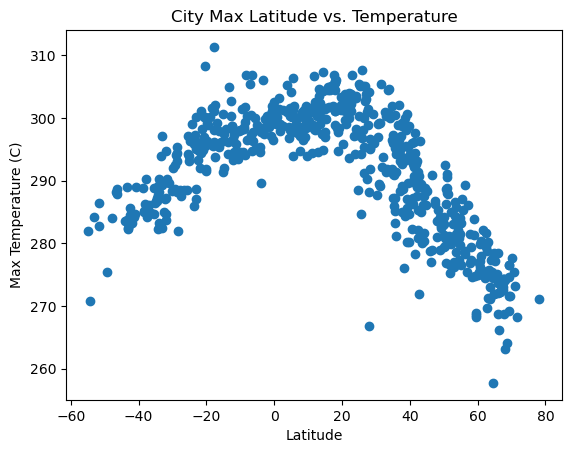

In [8]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values)


# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title("City Max Latitude vs. Temperature")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

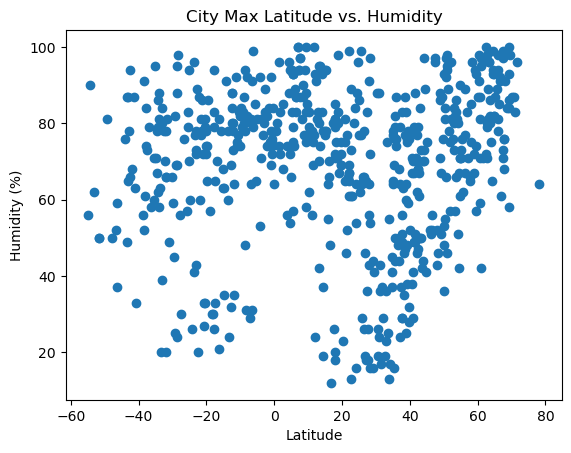

In [9]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("City Max Latitude vs. Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

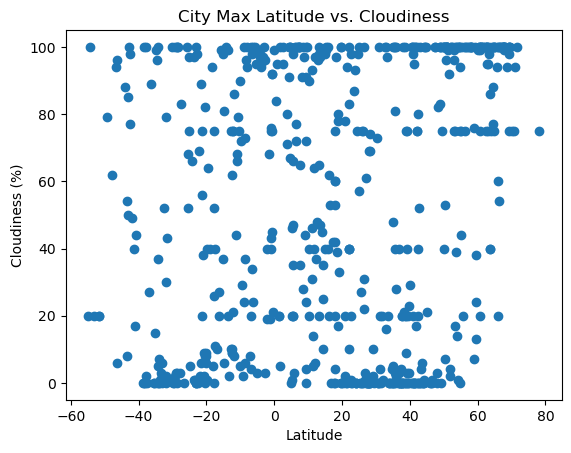

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("City Max Latitude vs. Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

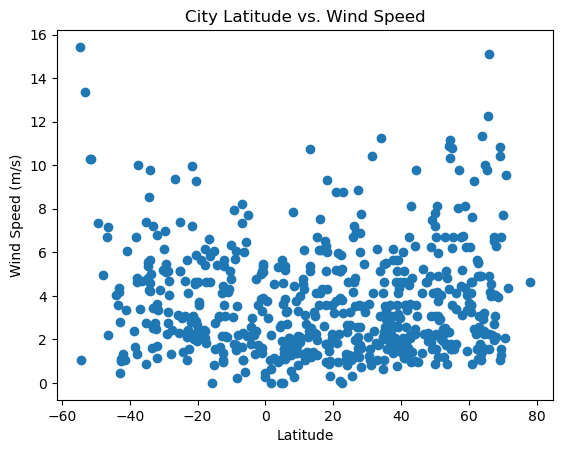

In [11]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title("City Latitude vs. Wind Speed")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# x_values: first set of data
# y_values: second set of data
# regEQplotX: where the linear regression equasion appears on the plot x line
# regEQplotY: where the linear regression equasion appears on the plot y line
# y_label: the y axis label of the plot (x label is always Latitude)

def linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    print(f'The r-square is {rvalue}')
    print(line_eq)
    plt.annotate(line_eq,(regEQplotX,regEQplotY),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(f'{y_label}')
    plt.grid()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Holualoa,19.6228,-155.9522,301.23,69,0,3.60,US,1697143034
1,Ad Dabbah,18.0500,30.9500,305.60,18,0,9.32,SD,1697143027
4,Port-Cartier,50.0334,-66.8654,284.12,93,100,2.19,CA,1697143034
6,Domna,51.8971,113.1573,275.24,75,4,2.00,RU,1697143034
7,Iqaluit,63.7506,-68.5145,273.00,80,40,1.03,CA,1697143034


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,Port-Aux-Francais,-49.3500,70.2167,275.34,81,79,7.35,TF,1697142925
3,Waitangi,-43.9535,-176.5597,283.61,76,88,4.02,NZ,1697142472
5,Avarua,-21.2078,-159.7750,298.18,78,20,3.09,CK,1697143034
9,Puerto Natales,-51.7236,-72.4875,286.40,50,20,10.29,CL,1697142786
19,Papatowai,-46.5619,169.4708,288.21,52,94,6.72,NZ,1697143035


###  Temperature vs. Latitude Linear Regression Plot

The r-square is -0.8618661719727754
y = -0.48x + 307.71


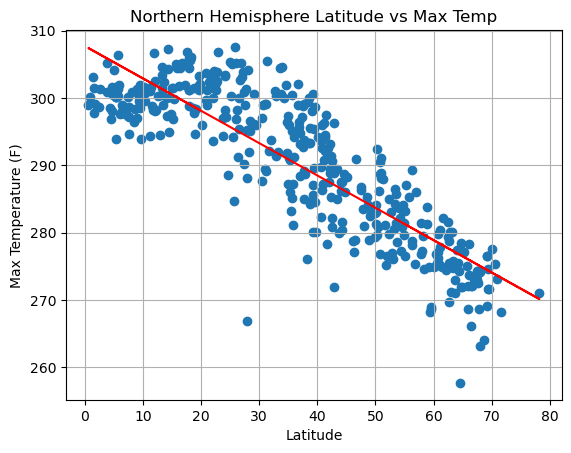

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
#tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = 40
#label the y axis
y_label = "Max Temperature (F)"
#give the title
plt.title(f'Northern Hemisphere Latitude vs Max Temp')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.show()

The r-square is 0.7992350804062521
y = 0.39x + 301.97


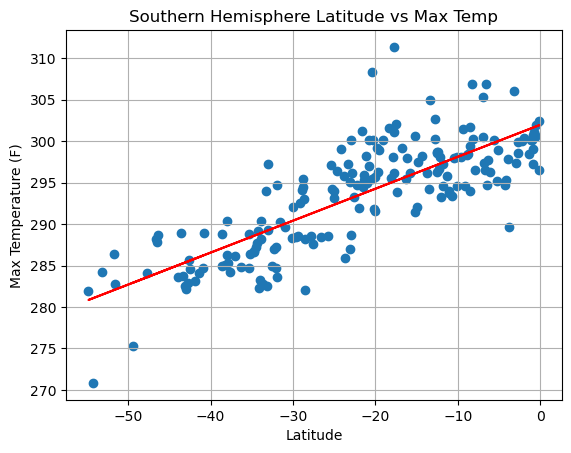

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
#tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = 40
#label the y axis
y_label = "Max Temperature (F)"
#give the title
plt.title(f'Southern Hemisphere Latitude vs Max Temp')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.show()

**Discussion about the linear relationship:** The farther away from 0 the lower the Max temp will get this is because the equator is at 0 Latatude and those the farther from the equator you go the colder it becomes.

### Humidity vs. Latitude Linear Regression Plot

The r-square is 0.10409300755714578
y = 0.11x + 65.13


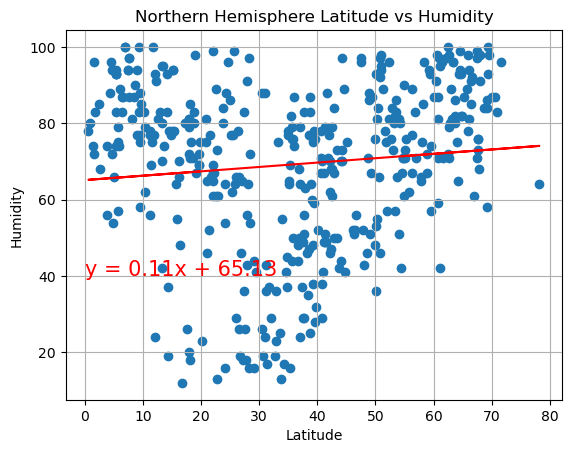

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
#tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = 40
#label the y axis
y_label = "Humidity"
#give the title
plt.title(f'Northern Hemisphere Latitude vs Humidity')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.show()

The r-square is 0.1531840509010605
y = 0.22x + 73.34


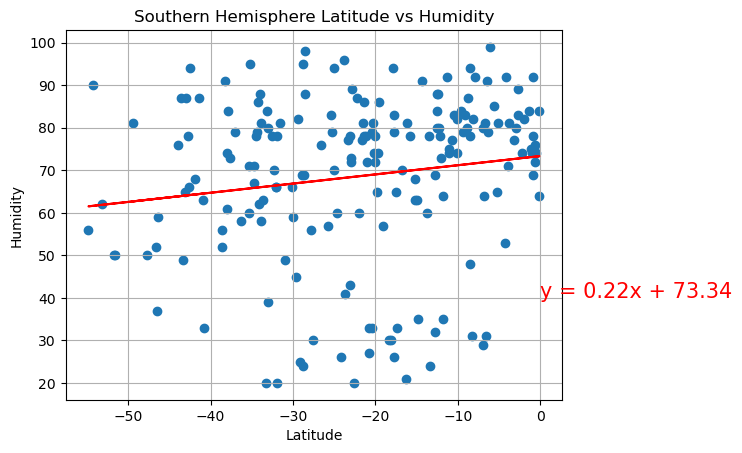

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
#tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = 40
#label the y axis
y_label = "Humidity"
#give the title
plt.title(f'Southern Hemisphere Latitude vs Humidity')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.show()

**Discussion about the linear relationship:** Humidity between the northern and southern hemisphere are about the same and also pretty much everywhere and contains a positive relationship.

### Cloudiness vs. Latitude Linear Regression Plot

The r-square is 0.25263615041215154
y = 0.54x + 35.13


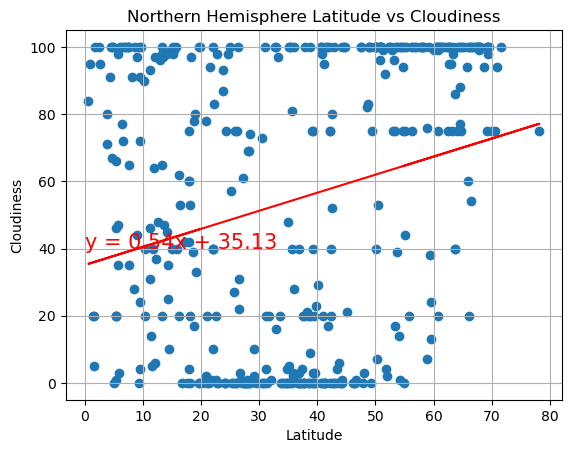

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
#tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = 40
#label the y axis
y_label = "Cloudiness"
#give the title
plt.title(f'Northern Hemisphere Latitude vs Cloudiness')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.show()

The r-square is 0.15651312416161017
y = 0.44x + 55.32


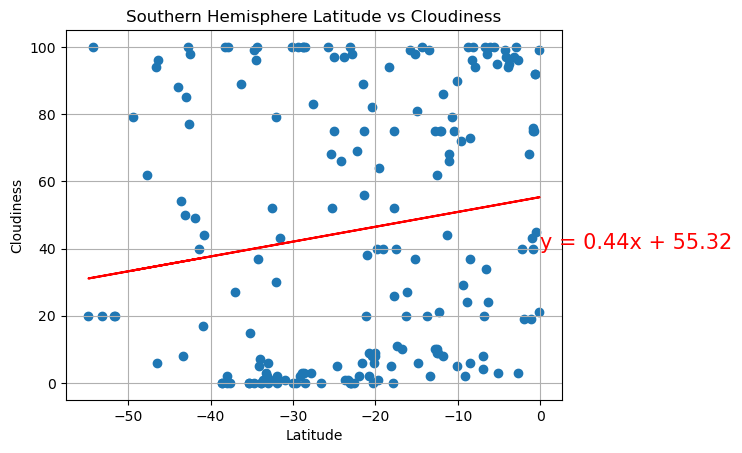

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
#tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = 40
#label the y axis
y_label = "Cloudiness"
#give the title
plt.title(f'Southern Hemisphere Latitude vs Cloudiness')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.show()

**Discussion about the linear relationship:** Cloudyness is the same as humidity because of the large spread of datapoints the overall regresstion line is positive for both hemispheres and we see a lot of data pointing at 100% cloudy and others with 0% cloudy.

### Wind Speed vs. Latitude Linear Regression Plot

The r-square is 0.2436259529451133
y = 0.03x + 2.48


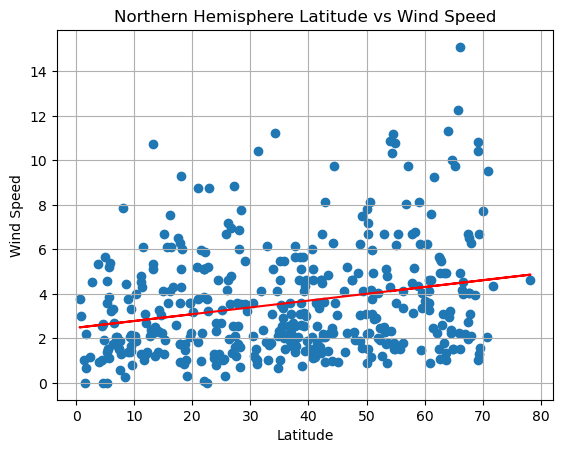

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
#tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = 40
#label the y axis
y_label = "Wind Speed"
#give the title
plt.title(f'Northern Hemisphere Latitude vs Wind Speed')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.show()

The r-square is -0.27182975726137665
y = -0.05x + 2.88


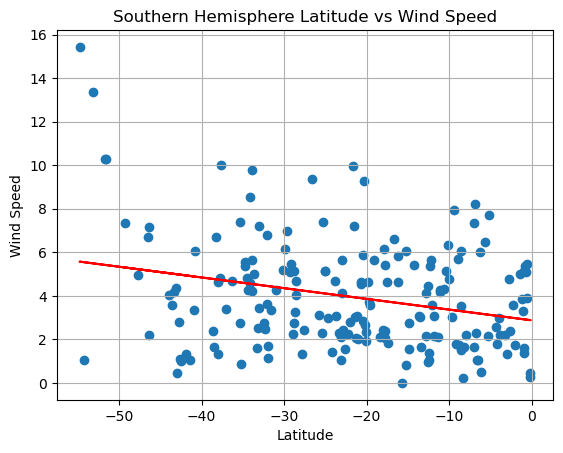

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
#tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = 40
#label the y axis
y_label = "Wind Speed"
#give the title
plt.title(f'Southern Hemisphere Latitude vs Wind Speed')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.show()

**Discussion about the linear relationship:** Wind Speed appears to be like tempurature where the farther from the equator the higher the wind speed is.